**Customers & Orders**

*How many unique customers are in the dataset?*

In [3]:
import pandas as pd

In [4]:
customers = pd.read_csv(r'C:\Users\vrssv\Desktop\Project (Mine)\Chatgpt\Customers.csv')

In [5]:
customers.head()

,CustomerID,Name,Location,Segment
0,1001,Customer_0,East,Home Office
1,1002,Customer_1,West,Home Office
2,1003,Customer_2,North,Consumer
3,1004,Customer_3,East,Consumer
4,1005,Customer_4,East,Corporate


In [6]:
unique_customers_count = customers['CustomerID'].nunique()
unique_customers_count

200

*Which customer made the highest total purchase (SalesAmount)?*

In [8]:
orders = pd.read_csv(r'C:\Users\vrssv\Desktop\Project (Mine)\Chatgpt\Orders.csv')

In [9]:
orders.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount
0,2001,1035,2023-02-16,539,2,412.64
1,2002,1081,2023-10-15,540,3,986.34
2,2003,1090,2023-09-23,517,3,742.80
3,2004,1008,2023-01-16,537,9,4241.79
4,2005,1093,2023-07-18,539,7,1444.24


In [10]:
top_customer = orders.groupby('CustomerID')['SalesAmount'].sum().idxmax() #
top_customer_total = orders.groupby('CustomerID')['SalesAmount'].sum().max()
top_customer_name = customers.loc[customers['CustomerID'] == top_customer, 'Name'].values[0]

In [11]:
top_customer

1109

In [12]:
top_customer_name

'Customer_108'

In [13]:
top_customer_total

19874.17

*What is the average order quantity per product category?*

In [15]:
products = pd.read_csv(r'C:\Users\vrssv\Desktop\Project (Mine)\Chatgpt\Products.csv')

In [16]:
products.head()

,ProductID,Category,Subcategory,Price
0,501,Furniture,Accessories,336.89
1,502,Office Supplies,Phones,154.37
2,503,Furniture,Accessories,478.34
3,504,Technology,Binders,374.19
4,505,Technology,Binders,286.09


In [17]:
order_with_category = orders.merge(products[['ProductID','Category']], on='ProductID')
avg_quantity_per_category = order_with_category.groupby('Category')['Quantity'].mean().round(2)
avg_quantity_per_category

Category
Furniture          5.04
Office Supplies    4.72
Technology         5.08
Name: Quantity, dtype: float64

These values indicate that Technology products have the highest average quantity per order, closely followed by Furniture

**Which region has the most customers?**

In [20]:
customer_by_region = customers['Location'].value_counts()
top_region = customer_by_region.idxmax()
top_region_count = customer_by_region.max()

In [21]:
top_region

'East'

In [22]:
top_region_count

54

The region with the most customers is East, with 54 customers

In [24]:
customers.head()

,CustomerID,Name,Location,Segment
0,1001,Customer_0,East,Home Office
1,1002,Customer_1,West,Home Office
2,1003,Customer_2,North,Consumer
3,1004,Customer_3,East,Consumer
4,1005,Customer_4,East,Corporate


In [25]:
products.head()

,ProductID,Category,Subcategory,Price
0,501,Furniture,Accessories,336.89
1,502,Office Supplies,Phones,154.37
2,503,Furniture,Accessories,478.34
3,504,Technology,Binders,374.19
4,505,Technology,Binders,286.09


In [26]:
orders.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount
0,2001,1035,2023-02-16,539,2,412.64
1,2002,1081,2023-10-15,540,3,986.34
2,2003,1090,2023-09-23,517,3,742.80
3,2004,1008,2023-01-16,537,9,4241.79
4,2005,1093,2023-07-18,539,7,1444.24


**What is the total monthly sales for each region?**

In [28]:
import matplotlib.pyplot as plt

In [29]:
order_with_region = orders.merge(customers[['CustomerID','Location']], on = 'CustomerID')
order_with_region['OrderDate'] = pd.to_datetime(order_with_region['OrderDate'])
order_with_region['Month'] = order_with_region['OrderDate'].dt.to_period('M').astype(str)

In [30]:
monthly_sales = order_with_region.groupby(['Month','Location'])['SalesAmount'].sum().reset_index()

In [31]:
pivot = monthly_sales.pivot(index='Month',columns='Location', values = 'SalesAmount').fillna(0)

In [32]:
pivot.head()

Location,East,North,South,West
Month,,,,
2023-01,34790.80,28973.08,25987.36,45144.67
2023-02,14602.58,20756.15,15169.03,21912.27
2023-03,20599.44,23408.78,12975.22,26032.45
2023-04,31270.74,24897.60,21308.93,19336.45
2023-05,30646.75,12011.30,26266.82,21401.64


In [33]:
order_with_region.head()

,OrderID,CustomerID,OrderDate,ProductID,Quantity,SalesAmount,Location,Month
0,2001,1035,2023-02-16,539,2,412.64,South,2023-02
1,2002,1081,2023-10-15,540,3,986.34,East,2023-10
2,2003,1090,2023-09-23,517,3,742.80,South,2023-09
3,2004,1008,2023-01-16,537,9,4241.79,North,2023-01
4,2005,1093,2023-07-18,539,7,1444.24,South,2023-07


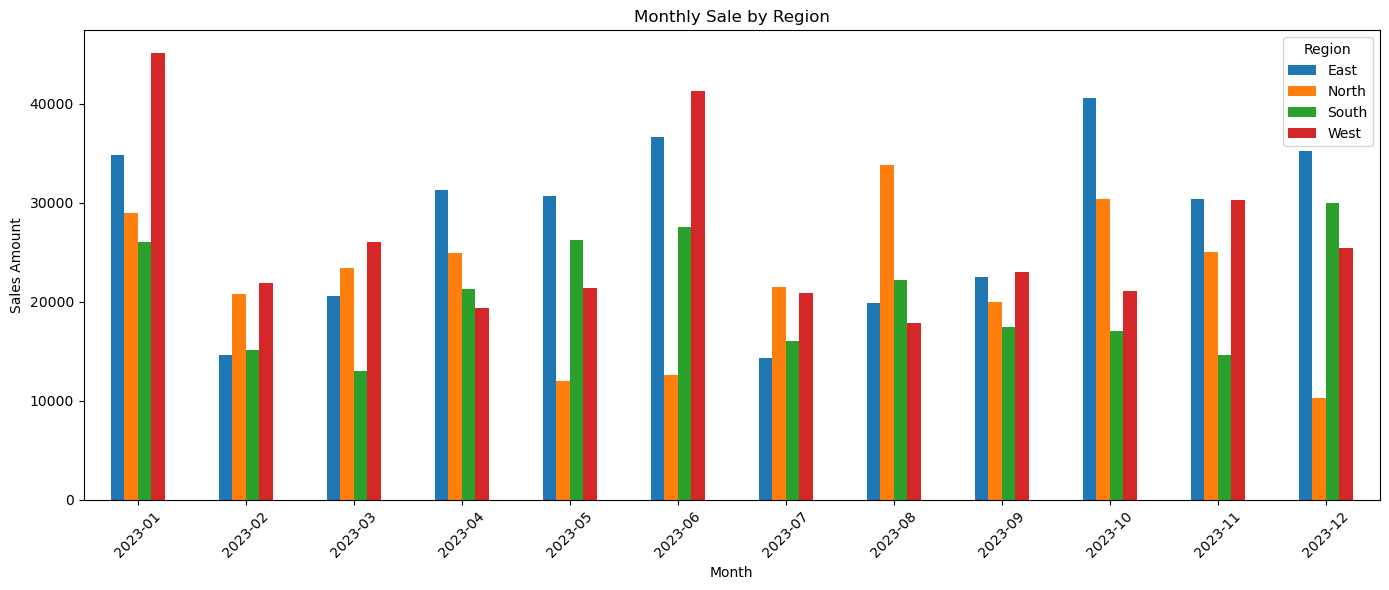

In [34]:
pivot.plot(kind='bar',figsize=(14,6))
plt.title ('Monthly Sale by Region')
plt.xlabel ('Month')
plt.ylabel ('Sales Amount')
plt.xticks (rotation=45)
plt.legend (title = 'Region')
plt.tight_layout()
plt.show()

**Which product subcategory generates the highest revenue?**

In [36]:
order_with_subcategory = orders.merge(products[['ProductID','Subcategory']], on = 'ProductID')
subcategory_revenue = order_with_subcategory.groupby('Subcategory')['SalesAmount'].sum()
top_subcategory = subcategory_revenue.idxmax()
top_revenue = subcategory_revenue.max()

print(f"Top SubCategory : {top_subcategory}")
print(f"Total Revenue : {top_revenue}")

Top SubCategory : Binders
Total Revenue : 360144.41


 **What is the average sales per order by customer segment (Consumer, Corporate, Home Office)?**


In [38]:
order_with_segment = orders.merge(customers[['CustomerID','Segment']],on = "CustomerID")
avg_sales_by_segment = order_with_segment.groupby('Segment')['SalesAmount'].mean().round(2)
print("Average sales per order by customer segment:")
print(avg_sales_by_segment)

Average sales per order by customer segment:
Segment
Consumer       1143.33
Corporate      1113.87
Home Office    1206.57
Name: SalesAmount, dtype: float64


**Which 5 customers have made the most purchases in quantity and in value?**


In [40]:
customer_stats = orders.groupby("CustomerID")[['Quantity','SalesAmount']].sum()
top_by_quantity = customer_stats.sort_values(by='Quantity',ascending=False).head(5)
top_by_value = customer_stats.sort_values(by='SalesAmount', ascending=False).head(5)

In [41]:
customer_stats.head()

,Quantity,SalesAmount
CustomerID,,
1001,55,10238.57
1002,9,2666.07
1003,26,5464.79
1004,19,3146.21
1005,48,13493.26


In [42]:
top_by_quantity.head()

,Quantity,SalesAmount
CustomerID,,
1047,69,16478.96
1179,69,13093.62
1109,63,19874.17
1111,57,14174.10
1001,55,10238.57


In [43]:
top_by_value.head()

,Quantity,SalesAmount
CustomerID,,
1109,63,19874.17
1047,69,16478.96
1008,51,15953.72
1042,46,15019.73
1111,57,14174.10


In [44]:
top_by_quantity = top_by_quantity.merge(customers[['CustomerID','Name']], on = 'CustomerID')
top_by_value = top_by_value.merge(customers[['CustomerID','Name']], on = 'CustomerID')
print("Top 5 Customers by Total Purchase Value:")
print(top_by_value[['CustomerID','Name', 'SalesAmount']])

Top 5 Customers by Total Purchase Value:
   CustomerID          Name  SalesAmount
0        1109  Customer_108     19874.17
1        1047   Customer_46     16478.96
2        1008    Customer_7     15953.72
3        1042   Customer_41     15019.73
4        1111  Customer_110     14174.10
